# CoMoMo analysis

Analysis with KF of the CoMoMo CCAA data

Version: 16/07/2020

Author : JAH, JJGC

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.dates as mdates
plt.rcParams["figure.figsize"] = 8, 6
plt.rcParams["font.size"     ] = 12

In [2]:
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Sun Aug  2 13:28:48 2020


In [3]:
import numpy as np
import pandas as pd
import matplotlib

In [82]:
import c19.data_functions_momo as momodata
#import c19.momo_analysis       as c19ma

import c19.useir            as us
import c19.useir_plot       as usp
#import c19.kfilter          as kf
#import c19.ana_useir        as aus

import scipy          as sp
import scipy.stats    as stats
#import scipy.optimize as optimize

#from numpy.linalg import inv
#m_   = np.matmul
npa  = np.array

from c19.useir_comomo_llfit_ana import get_dpars, plot_dpars

## Data

### Load Data

In [5]:
path = '/Users/hernando/investigacion/bio/c19/cdata/'
dfv, dfe, dfc = momodata.comomo_from_csv(path=path)

In [6]:
dfv.head()

,Andalucia,Date,Aragon,Asturias,Baleares,Canarias,Cantabria,Castilla La Mancha,Castilla y Leon,Cataluna,C. Valenciana,Extremadura,Galicia,Madrid,Melilla,Murcia,Navarra,Pais Vasco,La Rioja
0,0.0,2020-03-05,0.0,0.0,2.0,0.0,0.5,13.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,0.0,1.0,0.0
1,1.5,2020-03-06,1.0,0.0,2.5,0.0,0.0,3.0,0.0,0.0,13.0,0.0,0.0,12.0,0.0,0.0,1.0,0.0,0.0
2,0.0,2020-03-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,1.5,9.0,0.0,2.5,0.0,1.5,6.0
3,0.0,2020-03-08,1.0,0.0,4.5,0.0,2.0,0.5,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,4.5,4.0,0.0
4,0.0,2020-03-09,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,8.0,0.0,0.0,0.0,16.0,2.0


In [7]:
def ca_cases(caname):
    dates  = dfv.Date.values
    cases  = dfv[caname].values
    ucases = dfe[caname].values
    return dates, cases, ucases

In [18]:
dfv.Date[0] == np.datetime64('2020-03-05')

True

In [39]:
dfd = dfv.groupby('Date')

In [40]:
canames = ['Madrid', 'Castilla y Leon', 'Castilla La Mancha',
           'Cataluna', 'C. Valenciana', 'Aragon',
           'Pais Vasco', 'Navarra', 'La Rioja',
           'Cantabria', 'Asturias', 'Galicia',
           'Murcia', 'Andalucia', 'Extremadura',
           'Canarias', 'Baleares']

In [76]:
dates = dfv.Date.values
vals  = []
evals = []
for date in dates:
    dfi  = dfv[dfv.Date == date]
    ival = np.sum(np.array([dfi[caname].values[0] for caname in canames]))
    vals.append(ival)
    dfei  = dfe[dfe.Date == date] 
    err  = np.array([dfei[caname].values[0] for caname in canames])
    #print(err)
    err  = np.sqrt(np.sum(err*err))
    evals.append(err)
vals  = np.array(vals)
evals = np.array(evals)
#    print(date, ival)

48929.0 166.9071598224594


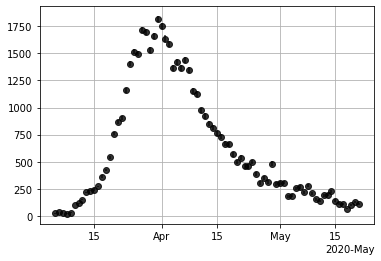

In [79]:
plt.errorbar(dates, vals, yerr = evals, marker = 'o', 
             ls = '', color = 'black', alpha = 0.8);
usp.formatter(plt.gca())
plt.grid();
print(np.sum(vals), np.sqrt(np.sum(evals * evals)))

In [83]:
ipath = '/Users/hernando/investigacion/bio/c19/data/'
confs = ['8complete', '8complete0', '4default', '2default1']

kdpars = {}
for conf in confs:
    ofile = ipath + 'ccaa_' + conf + '.csv'
    kdpars[conf] = get_dpars(ofile)

In [85]:
dfr = kdpars['4default']

In [86]:
dfr

,Madrid,Castilla y Leon,Castilla La Mancha,Cataluna,C. Valenciana,Aragon,Pais Vasco,Navarra,La Rioja,Cantabria,Asturias,Galicia,Murcia,Andalucia,Extremadura,Canarias,Baleares
pars,,,,,,,,,,,,,,,,,
beta,"[1.4814814814814814, 1.5204909227126762, 1.520...","[1.4814814814814814, 1.5540847559192312, 1.554...","[1.4814814814814814, 1.4825948053897, 1.482594...","[1.4814814814814814, 1.5111197072844655, 1.511...","[1.4814814814814814, 1.5031162270818714, 1.503...","[1.4814814814814814, 1.5433562096335036, 1.543...","[1.4814814814814814, 1.4819057800893163, 1.481...","[1.4814814814814814, 1.4921296987401167, 1.492...","[1.4814814814814814, 1.4893940435949766, 1.489...","[1.4814814814814814, 1.461336710415173, 1.4613...","[1.4814814814814814, 1.4722105826415053, 1.472...","[1.4814814814814814, 1.4925612857840482, 1.492...","[1.4814814814814814, 1.468800750789664, 1.4688...","[1.4814814814814814, 1.5385515000164927, 1.538...","[1.4814814814814814, 1.4850840109585528, 1.485...","[1.4814814814814814, 1.4880204133253119, 1.488...","[1.4814814814814814, 1.4368316944490898, 1.436..."
chi2,"[538.0664693608562, 489.1504867466395, 488.157...","[201.8330913530962, 187.752977088094, 187.6559...","[446.8239975260287, 446.7001770626171, 446.659...","[746.1160716349299, 709.1264420749544, 708.906...","[353.2802386430985, 327.58520315714844, 327.07...","[186.9188132411916, 171.83415956928587, 170.62...","[246.51887025955412, 246.51157157928105, 246.5...","[187.92961998077757, 172.78895437102415, 168.3...","[100.41968402552742, 99.86011035394023, 99.860...","[112.29898404794915, 108.28924121701169, 108.2...","[193.51942058480995, 183.2693102424489, 181.34...","[242.10735044879397, 231.14367253102762, 229.3...","[206.37113079421812, 205.86693200158382, 205.8...","[466.3183209001717, 441.0788154994109, 441.064...","[230.59239737431162, 230.4096361285184, 230.40...","[203.7556381736354, 203.62720944113263, 203.62...","[175.1682129353042, 174.58975982862876, 174.56..."
gamma,"[0.2222222222222222, 0.2102150045986228, 0.210...","[0.2222222222222222, 0.22411681864096394, 0.22...","[0.2222222222222222, 0.2213840265433344, 0.221...","[0.2222222222222222, 0.22852715903037135, 0.22...","[0.2222222222222222, 0.1960769475004635, 0.196...","[0.2222222222222222, 0.20210903384919526, 0.20...","[0.2222222222222222, 0.222106837885591, 0.2221...","[0.2222222222222222, 0.19943465963741908, 0.19...","[0.2222222222222222, 0.2145398594475091, 0.214...","[0.2222222222222222, 0.19834112674598545, 0.19...","[0.2222222222222222, 0.2455585270813368, 0.245...","[0.2222222222222222, 0.2028329081692476, 0.202...","[0.2222222222222222, 0.23613610913296273, 0.23...","[0.2222222222222222, 0.20217491624363396, 0.20...","[0.2222222222222222, 0.21884986305182574, 0.21...","[0.2222222222222222, 0.2149074901931436, 0.214...","[0.2222222222222222, 0.22827132587879967, 0.22..."
n,"[6578079.0, 6578079.0, 6578079.0, 6578079.0, 6...","[2409164.0, 2409164.0, 2409164.0, 2409164.0, 2...","[2026807.0, 2026807.0, 2026807.0, 2026807.0, 2...","[7600065.0, 7600065.0, 7600065.0, 7600065.0, 7...","[4963703.0, 4963703.0, 4963703.0, 4963703.0, 4...","[1308728.0, 1308728.0, 1308728.0, 1308728.0, 1...","[2199088.0, 2199088.0, 2199088.0, 2199088.0, 2...","[647554.0, 647554.0, 647554.0, 647554.0, 64755...","[315675.0, 315675.0, 315675.0, 315675.0, 31567...","[580229.0, 580229.0, 580229.0, 580229.0, 58022...","[1028244.0, 1028244.0, 1028244.0, 1028244.0, 1...","[2701743.0, 2701743.0, 2701743.0, 2701743.0, 2...","[1478509.0, 1478509.0, 1478509.0, 1478509.0, 1...","[8384408.0, 8384408.0, 8384408.0, 8384408.0, 8...","[1072863.0, 1072863.0, 1072863.0, 1072863.0, 1...","[2127685.0, 2127685.0, 2127685.0, 2127685.0, 2...","[1128908.0, 1128908.0, 1128908.0, 1128908.0, 1..."
phi,"[0.008396711238447227, 0.008396711238447227, 0...","[0.005792602949156447, 0.005792602949156447, 0...","[0.010591817315409176, 0.010591817315409176, 0...","[0.006716184423014655, 0.006716184423014655, 0...","[0.006917557514171677, 0.00691755751

In [88]:
parsmad = dfr['Madrid']
parsmad

pars
beta     [1.4814814814814814, 1.5204909227126762, 1.520...
chi2     [538.0664693608562, 489.1504867466395, 488.157...
gamma    [0.2222222222222222, 0.2102150045986228, 0.210...
n        [6578079.0, 6578079.0, 6578079.0, 6578079.0, 6...
phi      [0.008396711238447227, 0.008396711238447227, 0...
s1       [0.1197846041093659, 0.1197846041093659, 0.124...
t0       [44.749455148647, 43.12722428934603, 43.350432...
ti        [4.75, 4.75, 4.75, 4.75, 4.75, 4.75, 4.75, 4.75]
tm                [9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]
tr                [2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7]
Name: Madrid, dtype: object

In [90]:
keys = parsmad['beta']

In [104]:
npars = [str(xi) for xi in parsmad.index.values]
kpars = {}
for name in npars:
    kpars[name] = parsmad[name][-2]

In [151]:
kpars

{'beta': 1.5572956778079519,
 'chi2': 477.1709532001042,
 'gamma': 0.20663301106834822,
 'n': 6578079.0,
 'phi': 0.008465121186920856,
 's1': 0.12724789046127644,
 't0': 42.52977560038642,
 'ti': 4.75,
 'tm': 9.0,
 'tr': 2.7}

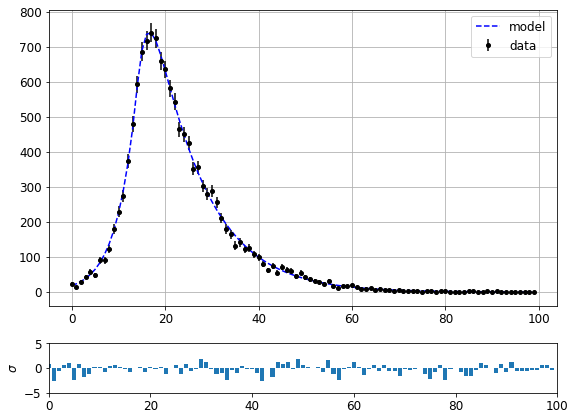

In [206]:
beta, gamma = kpars['beta'], kpars['gamma']
tr, ti, tm  = kpars['tr'], kpars['ti'], kpars['tm']
s1, t0, phi = kpars['s1'], kpars['t0'], kpars['phi']
nn          = kpars['n']

fmodel = us.dms_t0useirq_tr
pars   = (t0, beta, gamma, ti, tr, nn, phi, s1)

times, xdata = us.rvs(pars, fmodel)
xs, ys       = xdata

usp.plt_data_model(xs[:100], ys[:100], pars, fmodel)
plt.xlim((0., 100));

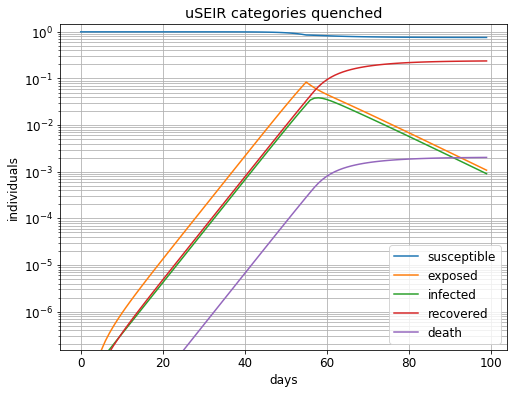

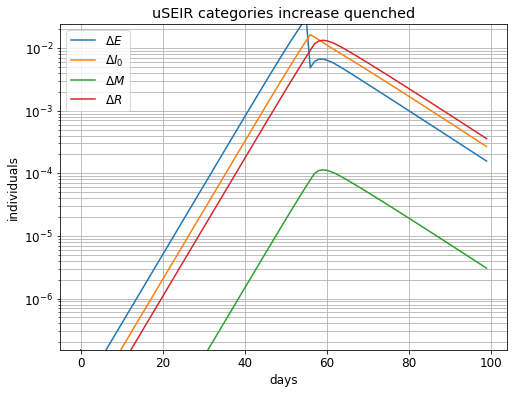

In [212]:
beta, gamma = kpars['beta'], kpars['gamma']
tr, ti, tm  = kpars['tr'], kpars['ti'], kpars['tm']
s1, t0, phi = kpars['s1'], kpars['t0'], kpars['phi']
nn          = kpars['n']

N               = nn
R0, TI, TR, TM  = beta * tr, ti, tr, tr
PhiM            = phi
ndays           = 100
rho             = 'weibull'
frho            = us.frho(rho)

S1, R1          = s1, gamma * tr
SS, DD          = us.uSEIRq(N, R0, TI, TR, TM, PhiM, S1, R1, ndays, rho)
S, E, I, R, M   = SS
DE, DI0, DR, DM = DD

ts = np.arange(ndays)
title = 'quenched'
usp.plt_uSEIR(ts, SS, DD, title, yscale = 'log', norma = True);

total infected  1590070.6890933253 fraction infected 0.24172265019823036
time of quench 54 , S   755898.3536682203 , fraction 0.1149117171849442 0.12724789046127644
time of quench 44 , S   64530.87264608871 , fraction 0.00980998748207318 0.12724789046127644


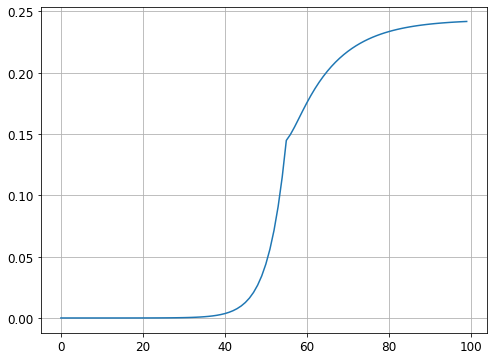

In [213]:
print('total infected ', nn - S[-1], 'fraction infected', 1 - S[-1]/nn)
plt.plot(ts, 1 - S/nn), plt.grid();

tn = 10 
ti = int(np.max(ts[ 1 - S/nn <= s1]))
print('time of quench', ti, ', S  ', nn - S[ti], ', fraction', 1 - S[ti]/nn, s1)

s10 = 1 - S[ti - tn]/nn
print('time of quench', ti - tn, ', S  ', nn - S[ti- tn], ', fraction', 1 - S[ti - tn]/nn, s1)

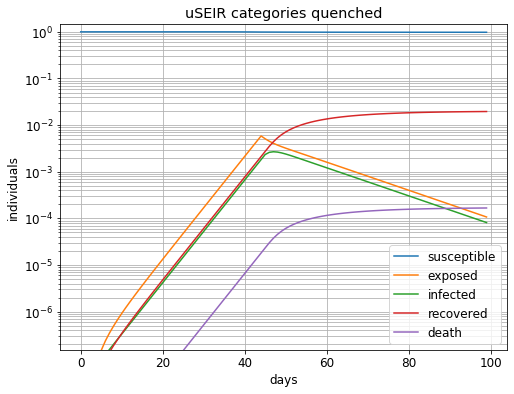

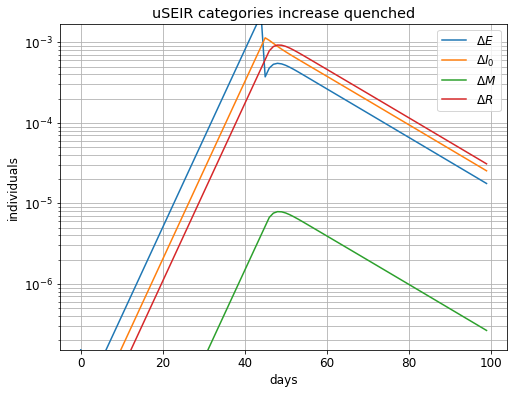

In [209]:
beta, gamma = kpars['beta'], kpars['gamma']
tr, ti, tm  = kpars['tr'], kpars['ti'], kpars['tm']
s1, t0, phi = kpars['s1'], kpars['t0'], kpars['phi']
nn          = kpars['n']

N               = nn
R0, TI, TR, TM  = beta * tr, ti, tr, tr
PhiM            = phi
ndays           = 100
rho             = 'weibull'
frho            = us.frho(rho)

S1, R1          = s10, gamma * tr
SS, DD          = us.uSEIRq(N, R0, TI, TR, TM, PhiM, S1, R1, ndays, rho)
S, E, I, R, M   = SS
DE, DI0, DR, DM = DD

ts = np.arange(ndays)
title = 'quenched'
usp.plt_uSEIR(ts, SS, DD, title, yscale = 'log', norma = True);

total infected  131078.6046767775 fraction infected 0.01992657805976139
99


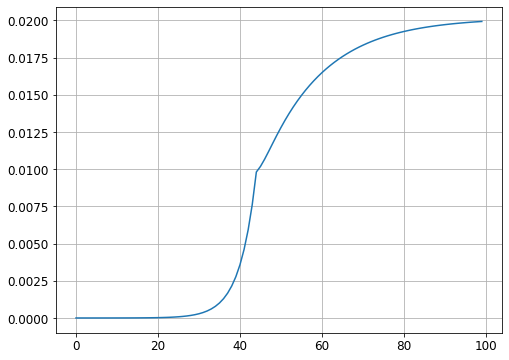

In [210]:
print('total infected ', nn - S[-1], 'fraction infected', 1 - S[-1]/nn)
plt.plot(ts, 1 - S/nn); plt.grid();

ti = int(np.max(ts[ 1 - S/nn <= s1]))
print(ti)

Conclusions:
  - total number of deaths -comomo- during 1st wave of Pandemie in Spain: 49000 persons
  - total of infected in Madrid at time of confinement: ~750000, 12 % of Madrid population.
  - total of infected in Madrid 10 days before the confinement, aprox 5 March, 1%, ~65 000 persons